In [1]:
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pycaret.time_series import *

In [3]:
import pandas as pd
import numpy as np

## **Dataset**

In [4]:
dataframe = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ion_productivity_forecast/datas/vendas_forecast.csv', sep=';')
dataframe.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,...,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
0,8802020,227905.0,4589672.0,1,F,2021-09-27 00:00:00,505.730,505.7300,22580,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8802025,227909.0,4589715.0,1,F,2021-09-27 00:00:00,258.900,258.9000,28802,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8802111,NaN,NaN,1,R,2021-09-27 00:00:00,673.187,673.1874,22580,2220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8802436,227907.0,4589694.0,1,F,2021-09-27 00:00:00,229.920,229.9200,3020,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8802438,228162.0,4594076.0,1,F,2021-09-27 00:00:00,555.840,555.8400,17814,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataframe.shape

(9110, 40)

In [6]:
dataframe['dtemissao'] = pd.to_datetime(dataframe['dtemissao'])

In [7]:
dataframe = dataframe.sort_values(by=['dtemissao'])

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9110 entries, 0 to 9109
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   numpedido                 9110 non-null   int64         
 1   numcarga                  8465 non-null   float64       
 2   numnota                   8550 non-null   float64       
 3   condvenda                 9110 non-null   int64         
 4   posicao                   9110 non-null   object        
 5   dtemissao                 9110 non-null   datetime64[ns]
 6   vltotal                   9110 non-null   float64       
 7   vltabela                  9110 non-null   float64       
 8   codcli                    9110 non-null   int64         
 9   codvendedor               9110 non-null   int64         
 10  codfilial                 9110 non-null   int64         
 11  codfilialnf               9110 non-null   int64         
 12  codplpag            

In [10]:
dataframe.index = pd.Index(range(9110))
dataframe.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,...,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
0,8802020,227905.0,4589672.0,1,F,2021-09-27,505.73,505.73,22580,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8804585,227909.0,4589720.0,1,F,2021-09-27,2581.90,2581.90,28802,574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8804371,227909.0,4589721.0,1,F,2021-09-27,112.52,112.52,28802,574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8804370,227905.0,4589673.0,1,F,2021-09-27,75.90,75.90,22580,574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8804338,227905.0,4589671.0,1,F,2021-09-27,1787.90,1787.90,22580,574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_1160 = dataframe[dataframe['codvendedor'] == 1160]
df_1160.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,...,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
0,8802020,227905.0,4589672.0,1,F,2021-09-27,505.73,505.73,22580,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,8802650,227867.0,4588796.0,1,ET,2021-09-27,594.24,594.24,11790,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,8802581,227887.0,4589312.0,1,ET,2021-09-27,527.52,527.52,30100,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,8802598,228044.0,4592378.0,1,ET,2021-09-27,232.80,232.80,19010,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8802025,227909.0,4589715.0,1,F,2021-09-27,258.90,258.90,28802,1160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_1160.shape

(2321, 40)

In [31]:
df_ = df_1160[['vltotal', 'dtemissao']]
df_.index = pd.Index(range(2321))
df_

,vltotal,dtemissao
0,505.730,2021-09-27
1,594.240,2021-09-27
2,527.520,2021-09-27
3,232.800,2021-09-27
4,258.900,2021-09-27
...,...,...
2316,2101.972,2022-08-17
2317,1667.320,2022-08-17
2318,4101.933,2022-08-17
2319,79.080,2022-08-17


In [50]:
df = df_.groupby(df_['dtemissao']).sum()
df

,vltotal
dtemissao,
2021-09-27,5062.070
2021-09-28,3049.300
2021-09-29,75858.840
2021-09-30,69926.710
2021-10-01,14842.031
...,...
2022-08-13,44509.854
2022-08-15,3966.670
2022-08-16,14293.688


<AxesSubplot:xlabel='dtemissao'>

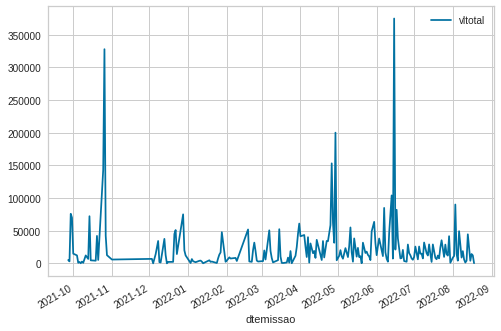

In [51]:
df.plot()

In [52]:
df_.dtypes

vltotal             float64
dtemissao    datetime64[ns]
dtype: object

In [54]:
df= df.asfreq('D')

In [56]:
df = df.fillna(0)

In [57]:
df.isnull().sum()

vltotal    0
dtype: int64

In [58]:
time_series = setup(df, session_id = 42)
time_series

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: eae6
INFO:logs:self.variable_keys: {'y_test_transformed', 'USI', 'approach_type', 'exp_name_log', 'log_plots_param', 'variable_keys', 'pipeline', 'fold_groups_param_full', 'exogenous_present', 'n_jobs_param', '_all_models_internal', 'html_param', 'X_test', 'X_test_transformed', '_ml_usecase', 'master_model_container', 'exp_id', 'enforce_exogenous', 'all_sp_values', '_all_models', 'fold_param', 'seasonality_present', 'strictly_positive', 'display_container', 'data', 'experiment__', 'y', 'logging_param', 'X_train', 'enforce_pi', 'idx', '_gpu_n_jobs_param', 'y_train_transformed', 'seasonal_period', 'gpu_param', '_all_metrics', 'index_type', 'X_transformed', 'X_train_transformed', 'y_transformed', 'X', 'fold_generator', '_available_plots', 'y_test', 'seed', 'fh', 'y_train', 'primary_sp_to_use

,Description,Value
0,session_id,42
1,Target,vltotal
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(326, 1)"
5,Train data shape,"(325, 1)"
6,Test data shape,"(1, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.27s...............


In [59]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,326.0
1,Summary,Statistics,Actual,Mean,,15327.104748
2,Summary,Statistics,Actual,Median,,3931.315
3,Summary,Statistics,Actual,Standard Deviation,,35373.700188
4,Summary,Statistics,Actual,Variance,,1251298665.00865
5,Summary,Statistics,Actual,Kurtosis,,53.482811
6,Summary,Statistics,Actual,Skewness,,6.363195
7,Summary,Statistics,Actual,# Distinct Values,,208.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",31.154485
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",49.155329


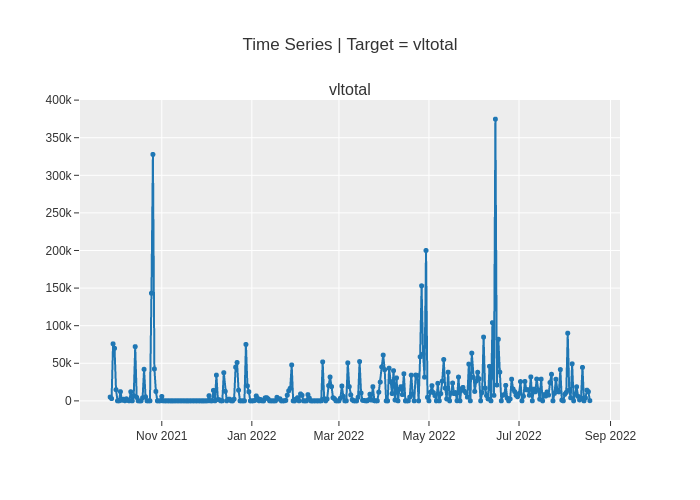

INFO:logs:Visual Rendered Successfully


In [60]:
plot_model(plot = 'ts')

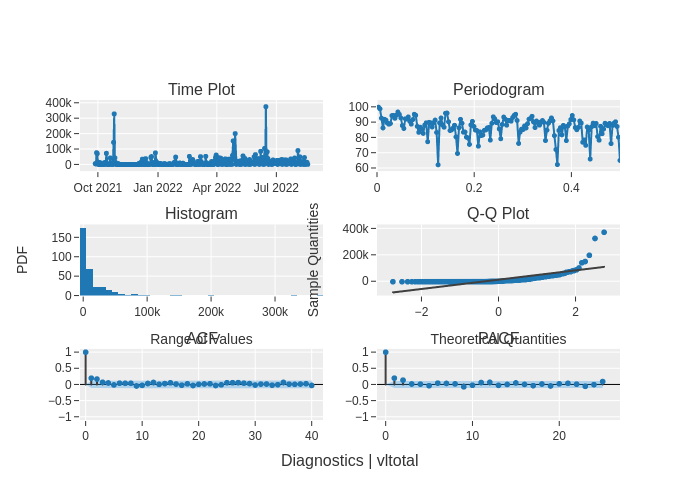

INFO:logs:Visual Rendered Successfully


In [61]:
plot_model(plot = 'diagnostics')

In [62]:
melhor = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,TT (Sec)
exp_smooth,Exponential Smoothing,4156.6132,4156.6132,0.9011,0.4342,0.2104,0.0922,0.0433
ets,ETS,4170.0841,4170.0841,0.9085,0.4342,0.2111,0.0925,0.0500
arima,ARIMA,4198.9466,4198.9466,0.8196,0.4447,0.2127,0.0932,0.2433
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,5351.1184,5351.1184,1.1516,0.4956,0.271,0.1187,0.0867
grand_means,Grand Means Forecaster,5252.013,5252.013,1.0759,0.496,0.266,0.1165,0.0233
par_cds_dt,Passive Aggressive w/ Cond. Deseasonalize & De...,19112.6767,19112.6767,1.3669,0.5027,0.9696,0.4243,0.0833
croston,Croston,5751.9362,5751.9362,1.244,0.5084,0.2913,0.1276,0.0233
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,6838.1261,6838.1261,0.7979,0.5108,0.3467,0.1518,0.2867
theta,Theta Forecaster,6345.4661,6345.4661,1.2551,0.5516,0.3214,0.1408,0.0667
auto_arima,Auto ARIMA,7144.7608,7144.7608,1.4985,0.5682,0.3619,0.1585,3.4700


INFO:logs:master_model_container: 26
INFO:logs:display_container: 2
INFO:logs:ExponentialSmoothing(sp=1, trend='add')
INFO:logs:compare_models() successfully completed......................................


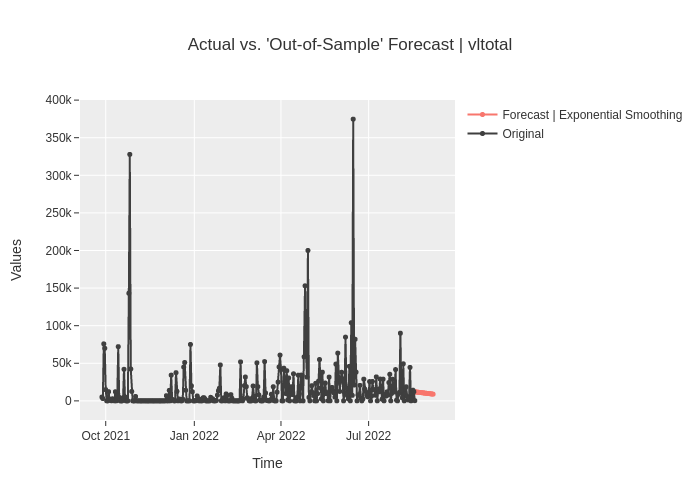

INFO:logs:Visual Rendered Successfully


In [64]:
plot_model(melhor, plot = 'forecast', data_kwargs = {'fh': 20})

In [70]:
prediction_holdout = predict_model(melhor);

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE
0,Exponential Smoothing,11766.6232,11766.6232,43.7031,1.9125,0.5994,0.262
